In [1]:
import sys
#sys.path.insert(0, '../scripts/')
sys.path.insert(0, '..')

import gym
import simulation
from io import BytesIO


from PIL import Image
from IPython import display
from matplotlib.pyplot import imshow
plt.rcParams["axes.grid"] = False

%matplotlib inline

from simulation.agents import NoneAgent, HeuristicAgent, RandomAgent

def save_img(data, name, path='/Users/rossgreen/PycharmProjects/simulation/images'):
    img = Image.fromarray(data, 'RGB')
    filename = f'{path}/{name}.png'
    img.save(filename)
    
def show(data):
    plt.figure(figsize=(30,8))
    plt.axis('off')
    imshow(data);

In [25]:
params = {
    'policy_frequency':  1/4,
    'simulation_frequency': 15,
    'save_history':      True,
    'offscreen_rendering': True,
    'max_demand':           15000
}

env = gym.make('highway-v0', **params)
obs, done = env.reset(), False
agent = NoneAgent(env)

[3804079953531548541]


In [26]:
obs

{"upstream_l": 4, "upstream_inflow": 0, "upstream_n_onramp1": 0, "upstream_n_onramp2": 0, "upstream_n_queued": 0, "upstream_k": 0.0, "upstream_v": 100.0, "upstream_q": 0.0, "downstream_l": 4, "downstream_inflow": 0, "downstream_n_onramp1": 0, "downstream_n_onramp2": 0, "downstream_n_queued": 0, "downstream_k": 0.0, "downstream_v": 100.0, "downstream_q": 0.0}

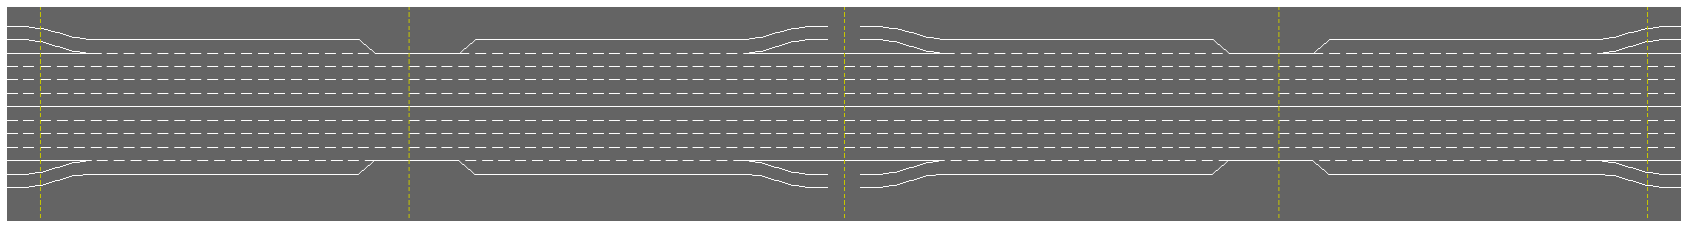

In [4]:
data = env.render('rgb_array')
show(data)

In [ ]:
obs, reward, done, info = env.step(1)

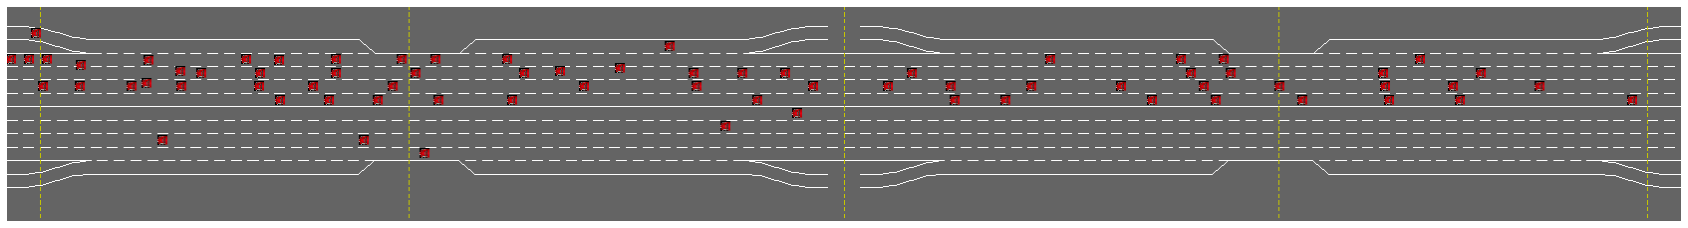

In [27]:
for i in range(10):
    obs, reward, done, info = env.step(0)

data = env.render('rgb_array')
show(data)

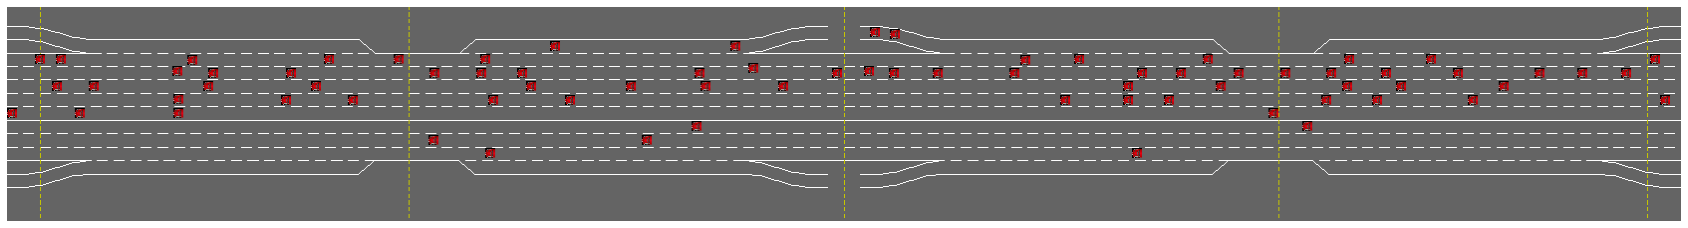

In [16]:
obs, reward, done, info = env.step(1)
data = env.render('rgb_array')
show(data)

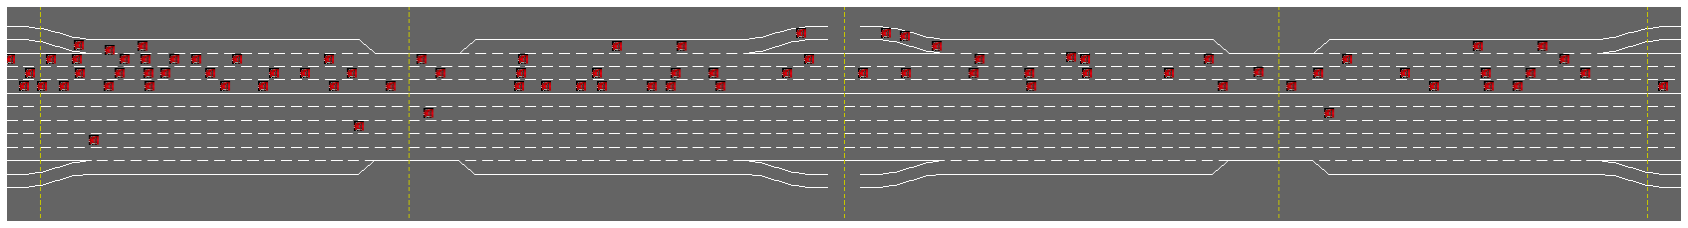

In [28]:
obs, reward, done, info = env.step(2)
data = env.render('rgb_array')
show(data)

In [14]:
save_img(data, 'state_sim2')

In [15]:
o = obs.to_dict()
upstream = {k.replace('upstream_', ''):v for k,v in o.items() if k.startswith('upstream')}
downstream = {k.replace('downstream_', ''):v for k, v in o.items() if k.startswith('downstream')}

df = pd.DataFrame({'state value': upstream.keys(), 'upstream': upstream.values(), 'downstream': downstream.values()})
df = df.round(1)
df.set_index('state value', inplace=True)
df

,upstream,downstream
state value,,
inflow,16.0,0.0
l,5.0,3.0
n_highway,38.0,5.0
n_onramp1,1.0,0.0
n_onramp2,1.0,0.0
n_queued,0.0,0.0
k,15.2,3.3
v_highway,92.6,95.6
v_onramp1,78.0,0.0


In [16]:
print(df.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  upstream &  downstream \\
state value &           &             \\
\midrule
inflow      &      16.0 &         0.0 \\
l           &       5.0 &         3.0 \\
n\_highway   &      38.0 &         5.0 \\
n\_onramp1   &       1.0 &         0.0 \\
n\_onramp2   &       1.0 &         0.0 \\
n\_queued    &       0.0 &         0.0 \\
k           &      15.2 &         3.3 \\
v\_highway   &      92.6 &        95.6 \\
v\_onramp1   &      78.0 &         0.0 \\
v\_onramp2   &      80.0 &         0.0 \\
q1          &   14400.0 &      1800.0 \\
q2          &    2700.0 &         0.0 \\
q3          &    4500.0 &         0.0 \\
q4          &    6300.0 &      2700.0 \\
q5          &    6300.0 &         0.0 \\
\bottomrule
\end{tabular}



In [14]:
obs.reshape((2,13))

array([[4.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.47048324e+01, 9.85412057e+01, 1.50000000e+01,
        7.20000000e+03, 5.40000000e+03, 3.60000000e+03, 5.40000000e+03,
        7.20000000e+03],
       [4.00000000e+00, 4.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.94929532e+01, 9.91771004e+01, 2.00000000e+00,
        9.00000000e+02, 9.00000000e+02, 9.00000000e+02, 9.00000000e+02,
        0.00000000e+00]])

In [2]:
from rl.agents.dqn import DQNAgent
from rl.callbacks import ModelIntervalCheckpoint, FileLogger
from rl.memory import SequentialMemory
from rl.policy import EpsGreedyQPolicy
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam



model = Sequential()
model.add(Flatten(input_shape=(3, 12)))
model.add(Dense(48, activation="relu"))
model.add(Dense(24, activation="relu"))
model.add(Dense(3, activation='linear'))

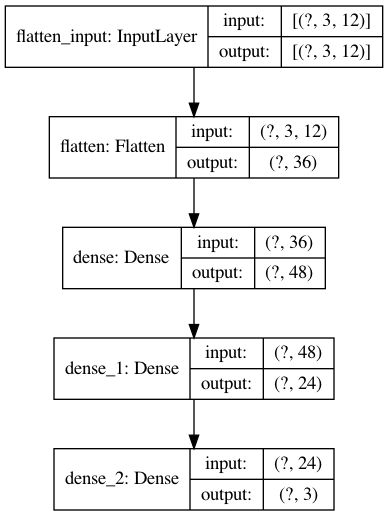

In [4]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [22]:
!pip install pydot

You should consider upgrading via the '/Users/rossgreen/.pyenv/versions/3.8.5/bin/python3.8 -m pip install --upgrade pip' command.
